In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [59]:
def value_from_file(fileway):
    with open(fileway, 'r') as f:
        n = []
        for line in f:
            line = f.readline()
            n.append(line.split('\t')[0])
    return list(map(float, n))
def total_shots(fileway, i):
    with open(fileway, 'r') as f:
        n = []
        for line in f:
            line = f.readline()
            n.append(line.split('\t')[i])
    l1 = list(map(float, n))
    return (sum(l1)/len(l1))

def histogram(fileway,name1,fileway1,name2,b1,b2): # b1,b2 - bins of hist
    fig, (p1, p2) = plt.subplots(1, 2, figsize=(16,3))
    p1.hist(value_from_file(fileway), bins = b1,color = 'blue');
    p1.set_xlim(-1.6,-1.45)
    p2.set_xlim(-1.6,-1.45)
    p1.set_ylabel('количество повторений')
    p1.set_xlabel('значение минимального состояния')
    p1.set_title(name1);
    p1.axes.grid(linestyle='--')
    p2.hist(value_from_file(fileway1),bins=b2, color = 'blue');
    p2.set_ylabel('количество повторений')
    p2.set_xlabel('значение минимального состояния')
    p2.set_title(name2);
    p2.axes.grid(linestyle='--')
    #fig.savefig("foo.pdf", bbox_inches='tight')

    
def hist_union(fileway,b,name,title):
    fig, ax = plt.subplots(figsize=(21,8))
    for i in range(len(fileway)):
        ax.hist(value_from_file(fileway[i]),bins = b[i], label = name[i], alpha = 0.5);
    ax.grid(True, linestyle = '--')
    ax.set_xlim(-1.6,-1.45)
    ax.legend(loc='upper left')
    ax.set_title(title)
    

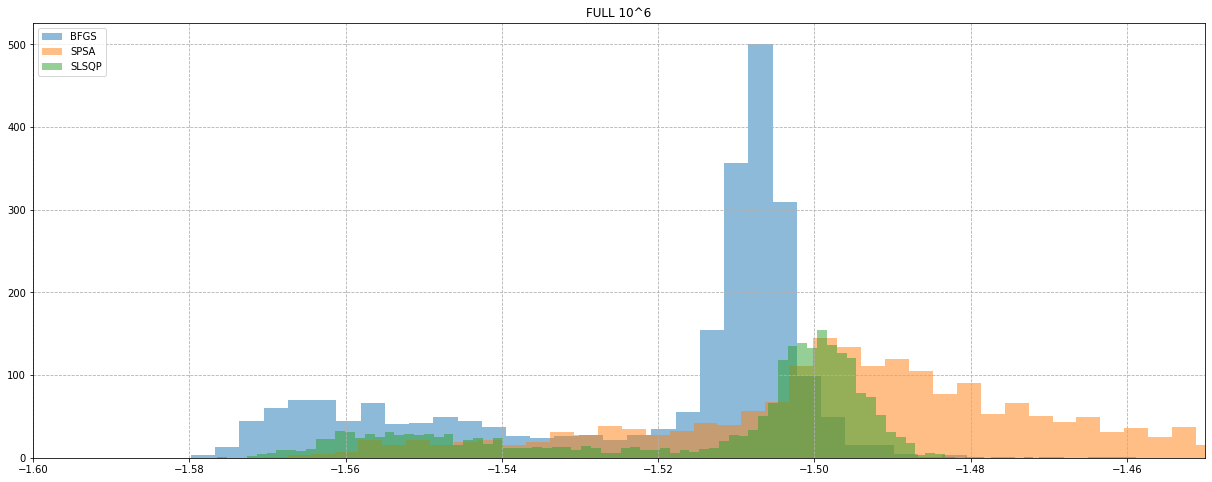

In [60]:
hist_union(fileway= ['Data/vqe_hadamard_bfgs_10^4.txt','Data/vqe_hadamard_spsa_10^4_maxiter_47.txt','Data/vqe_hadamard_slsqp_10^4_maxiter_100.txt'],name = ['BFGS','SPSA','SLSQP'], b = [1000,1000,1000], title = 'FULL 10^6')



In [61]:
total_shots('Data/vqe_hadamard_spsa_10^4.txt',1)

400.0

# Сomparison

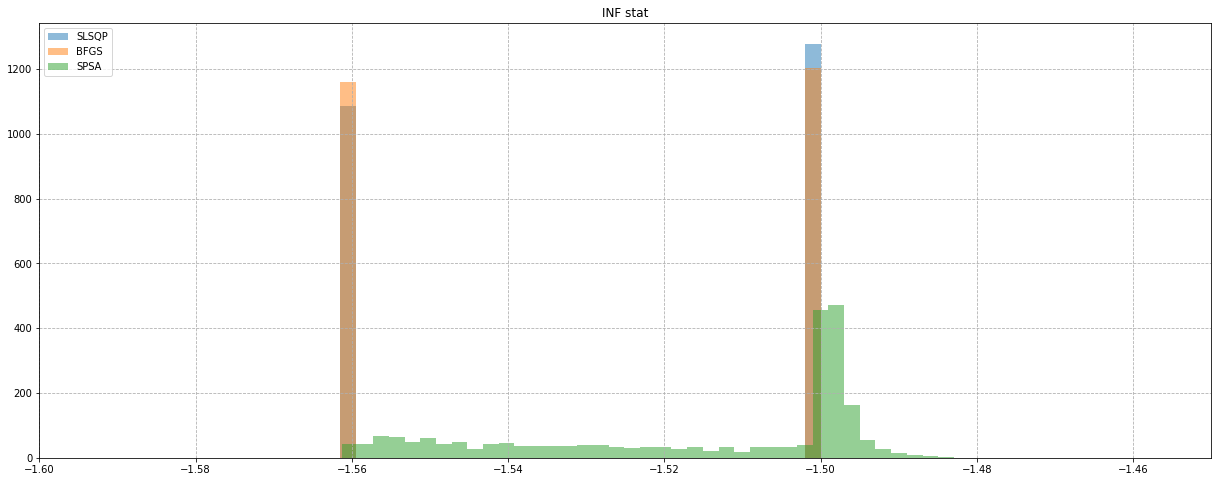

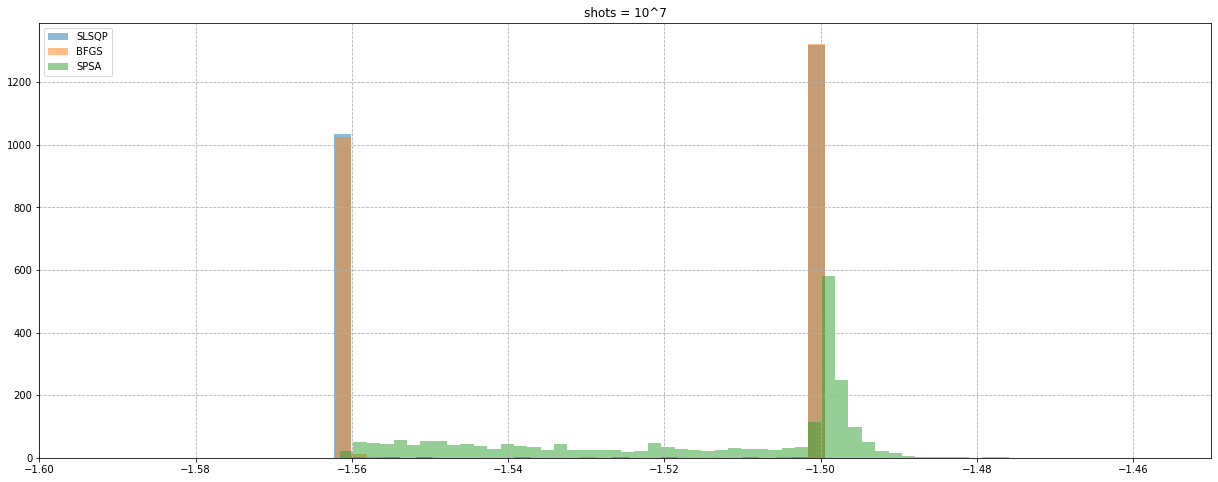

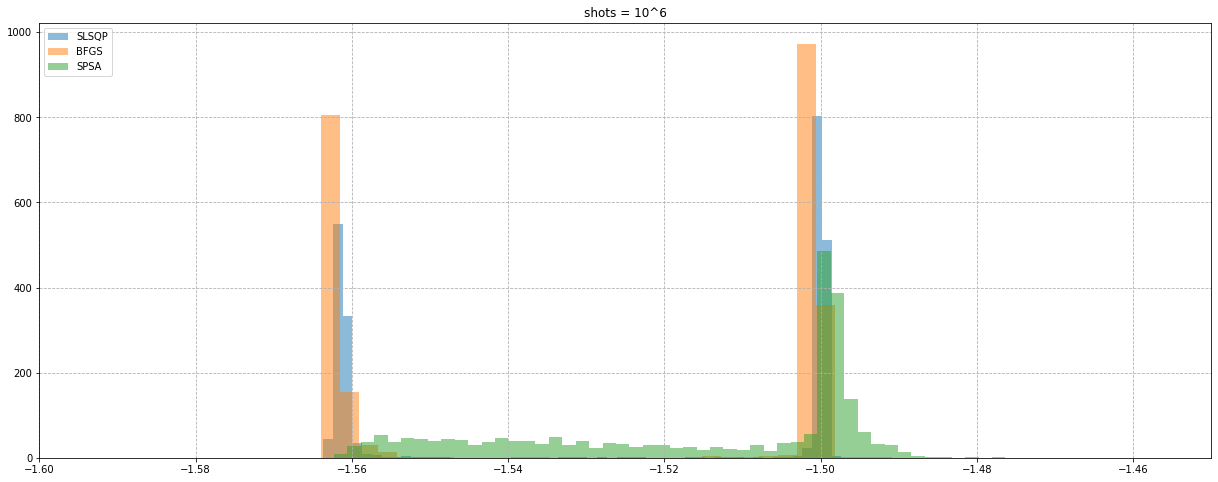

In [18]:
hist_union(fileway= ['Data/vqe_hadamard_slsqp_inf.txt','Data/vqe_hadamard_bfgs_inf.txt','Data/vqe_hadamard_spsa_inf.txt'],name = ['SLSQP','BFGS','SPSA'], b = [30,30,1500], title = 'INF stat')
hist_union(fileway= ['Data/vqe_hadamard_slsqp_10^7.txt','Data/vqe_hadamard_bfgs_10^7.txt','Data/vqe_hadamard_spsa_10^7.txt'],name = ['SLSQP','BFGS','SPSA'], b = [30,30,50], title = 'shots = 10^7')
hist_union(fileway= ['Data/vqe_hadamard_slsqp_10^6.txt','Data/vqe_hadamard_bfgs_10^6.txt','Data/vqe_hadamard_spsa_10^6.txt'],name = ['SLSQP','BFGS','SPSA'], b = [300,30,50], title = 'shots = 10^6')

# SLSQP

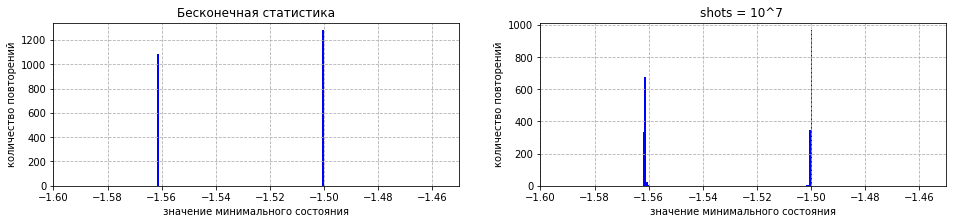

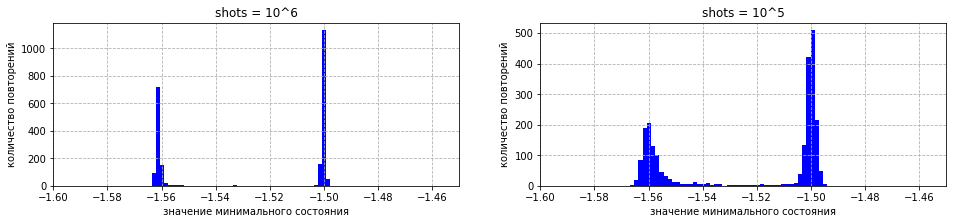

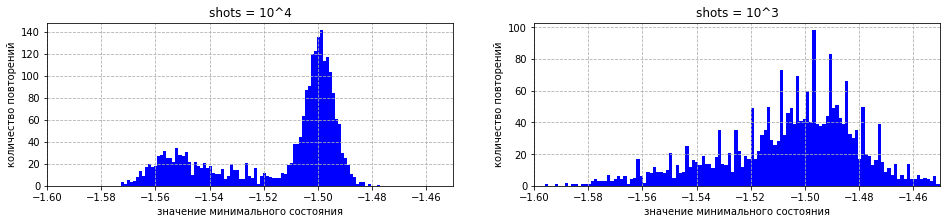

In [111]:
histogram(fileway = 'Data/vqe_hadamard_slsqp_inf.txt',fileway1='Data/vqe_hadamard_slsqp_10^7.txt', name1 = 'Бесконечная статистика',name2 = 'shots = 10^7 ',b1 = 100,b2= 100)
histogram(fileway = 'Data/vqe_hadamard_slsqp_10^6.txt',fileway1 = 'Data/vqe_hadamard_slsqp_10^5.txt',name1 = 'shots = 10^6',name2 = 'shots = 10^5',b1 = 250,b2 = 1150)
histogram(fileway = 'Data/vqe_hadamard_slsqp_10^4.txt',fileway1 = 'Data/vqe_hadamard_slsqp_10^3.txt',name1 = 'shots = 10^4',name2 = 'shots = 10^3',b1 = 1550,b2 = 1250)

# BFGS


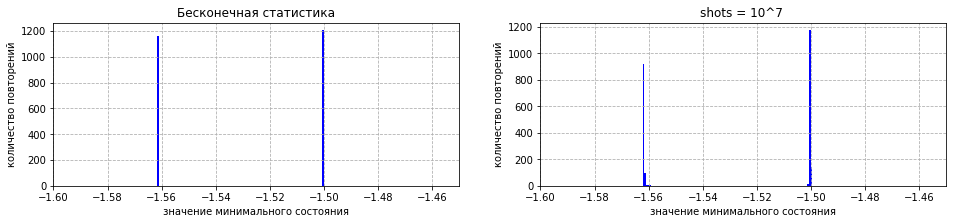

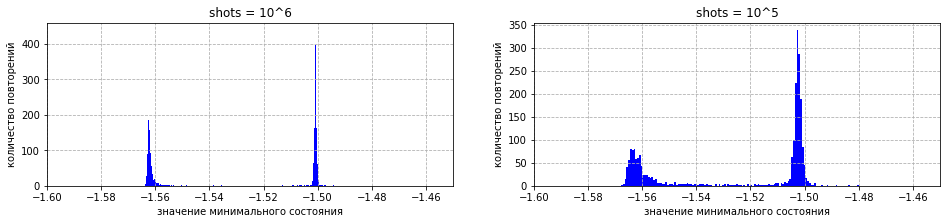

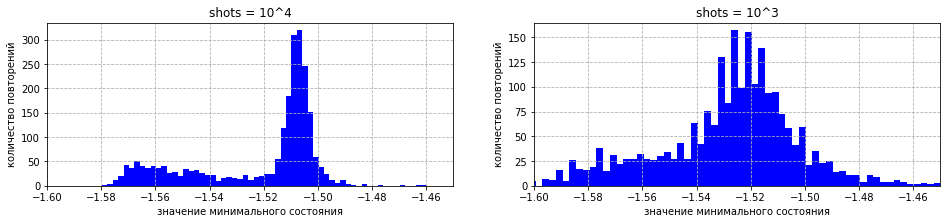

In [5]:
histogram(fileway = 'Data/vqe_hadamard_bfgs_inf.txt',fileway1='Data/vqe_hadamard_bfgs_10^7.txt', name1 = 'Бесконечная статистика',name2 = 'shots = 10^7 ',b1 = 100,b2= 100)
histogram(fileway = 'Data/vqe_hadamard_bfgs_10^6.txt',fileway1 = 'Data/vqe_hadamard_bfgs_10^5.txt',name1 = 'shots = 10^6',name2 = 'shots = 10^5',b1 = 250,b2 = 1150)
histogram(fileway = 'Data/vqe_hadamard_bfgs_10^4.txt',fileway1 = 'Data/vqe_hadamard_bfgs_10^3.txt',name1 = 'shots = 10^4',name2 = 'shots = 10^3',b1 = 1550,b2 = 1250)

# SPSA


FileNotFoundError: [Errno 2] No such file or directory: 'Data/vqe_hadamard_spsa_inf.txt'

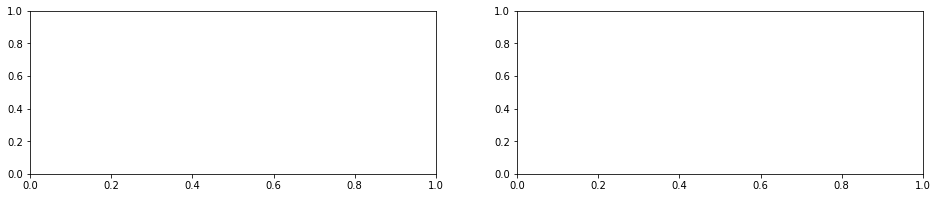

In [56]:
histogram(fileway = 'Data/vqe_hadamard_spsa_inf.txt',fileway1='Data/vqe_hadamard_spsa_10^7.txt', name1 = 'Бесконечная статистика',name2 = 'shots = 10^7 ',b1 = 700,b2= 100)
histogram(fileway = 'Data/vqe_hadamard_spsa_10^6.txt',fileway1 = 'Data/vqe_hadamard_spsa_10^5.txt',name1 = 'shots = 10^6',name2 = 'shots = 10^5',b1 = 250,b2 = 700)
histogram(fileway = 'Data/vqe_hadamard_spsa_10^4.txt',fileway1 = 'Data/vqe_hadamard_spsa_10^3.txt',name1 = 'shots = 10^4',name2 = 'shots = 10^3',b1 = 700,b2 = 700)

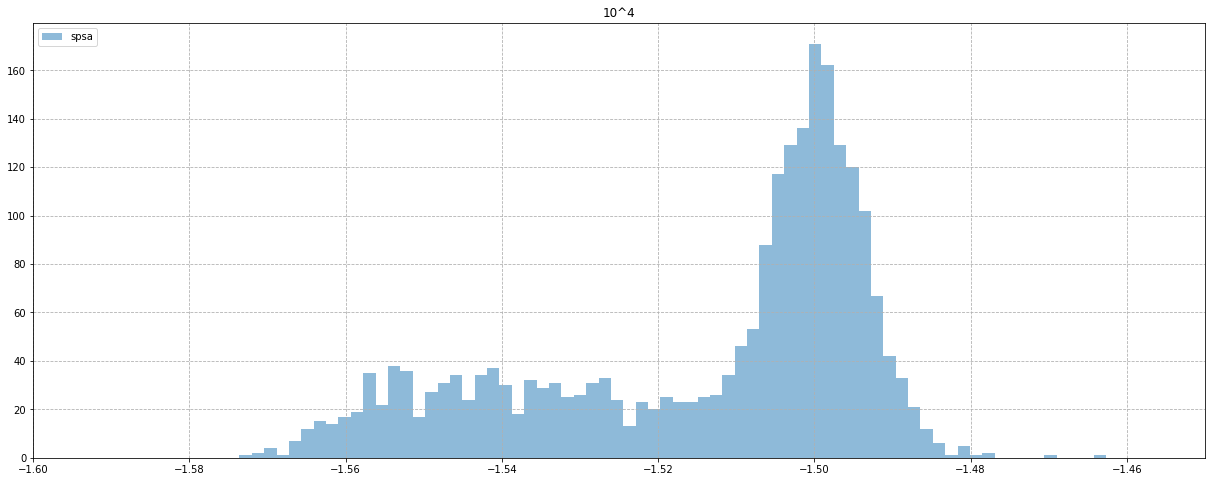

In [62]:
hist_union(fileway= ['Data/vqe_hadamard_spsa_10^4.txt'],name = ['spsa'], title = '10^4', b = [200])